# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.options.display.width = 1000

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others_plus_MGC_remove.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent
0,4.00,299.00,3.32,0.110000,1,1,132.0,0,0,0,0
1,4.00,299.00,3.32,0.290000,1,1,132.0,0,0,1,0
2,4.00,299.00,3.32,0.230000,1,1,132.0,0,0,1,0
3,4.00,299.00,3.32,0.730000,1,1,132.0,0,0,1,0
4,4.00,299.00,3.32,1.860000,1,1,132.0,0,0,1,0
5,4.00,299.00,3.32,0.210000,1,1,132.0,0,0,1,0
6,4.00,299.00,3.32,0.340000,1,1,132.0,0,0,1,0
7,4.00,299.00,3.32,0.240000,1,1,132.0,0,0,1,0
8,4.00,299.00,3.32,1.970000,1,1,132.0,0,0,1,0
9,4.00,299.00,3.32,0.690000,1,1,132.0,0,0,1,0


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
#DPPP_DTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [8]:

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.517
R² score for test set: 0.249


## Polynomial regression

Degree 1: R² train = 0.517, R² test = 0.249
Degree 2: R² train = 0.494, R² test = -3262860494095321137152.000
Degree 3: R² train = 0.830, R² test = 0.340
Degree 4: R² train = 0.830, R² test = -20098384088.307
Degree 5: R² train = 0.830, R² test = -171154.862
Degree 6: R² train = 0.830, R² test = -173781.877


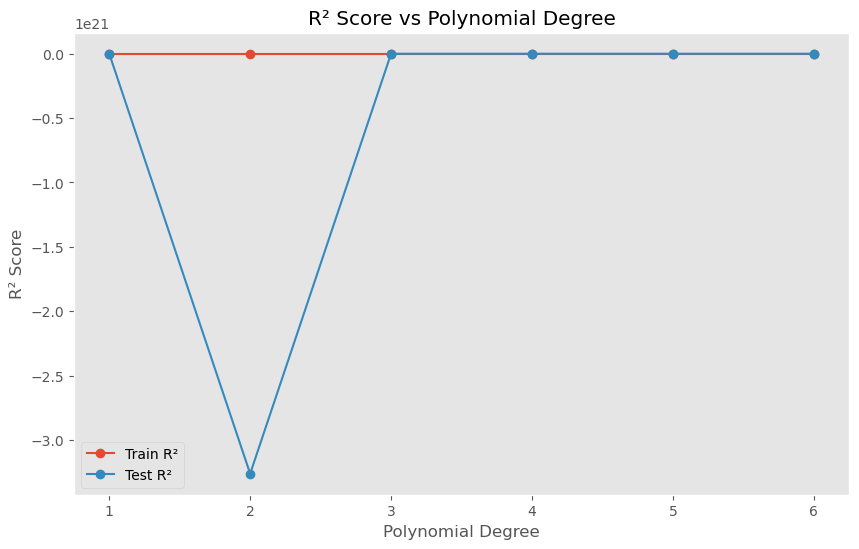

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.517, R² test = 0.250
Alpha 0.2: R² train = 0.517, R² test = 0.250
Alpha 0.3: R² train = 0.517, R² test = 0.251
Alpha 0.4: R² train = 0.517, R² test = 0.251
Alpha 0.5: R² train = 0.517, R² test = 0.252
Alpha 0.6: R² train = 0.517, R² test = 0.252
Alpha 0.7: R² train = 0.517, R² test = 0.252
Alpha 0.8: R² train = 0.517, R² test = 0.253
Alpha 0.9: R² train = 0.517, R² test = 0.253
Alpha 1.0: R² train = 0.517, R² test = 0.254


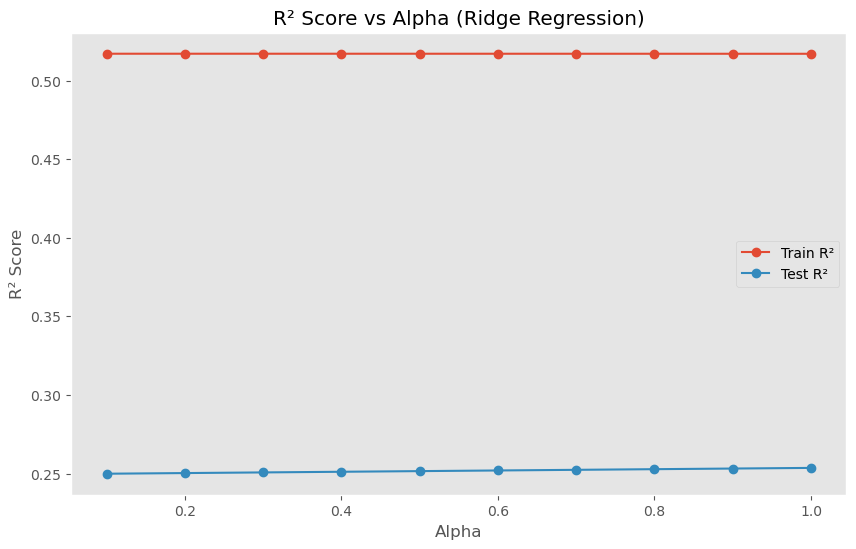

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.446, R² test = 0.244
Alpha 0.2: R² train = 0.358, R² test = 0.212
Alpha 0.3: R² train = 0.280, R² test = 0.186
Alpha 0.4: R² train = 0.190, R² test = 0.113
Alpha 0.5: R² train = 0.095, R² test = 0.043
Alpha 0.6: R² train = 0.000, R² test = -0.040
Alpha 0.7: R² train = 0.000, R² test = -0.040
Alpha 0.8: R² train = 0.000, R² test = -0.040
Alpha 0.9: R² train = 0.000, R² test = -0.040
Alpha 1.0: R² train = 0.000, R² test = -0.040


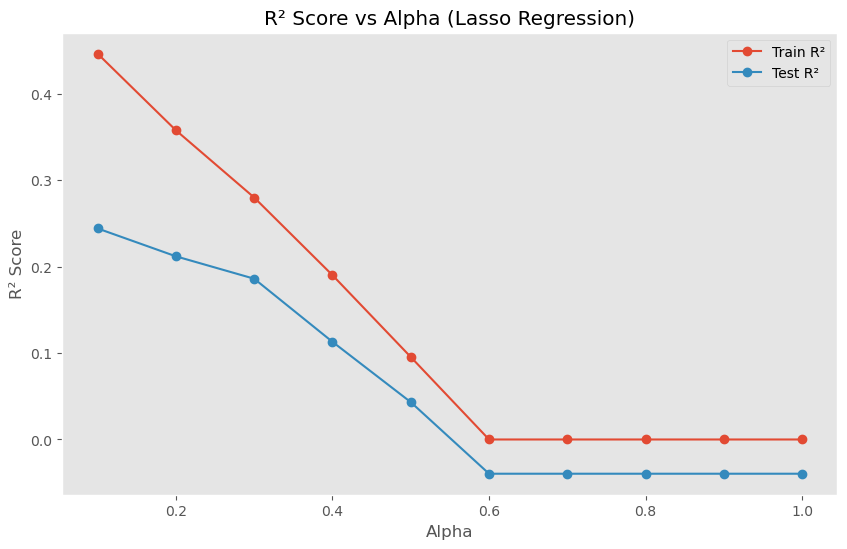

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.510432  0.293938
1     0.1       0.2  0.505988  0.292326
2     0.1       0.3  0.500939  0.290847
3     0.1       0.4  0.495207  0.289280
4     0.1       0.5  0.488192  0.286098
5     0.1       0.6  0.479802  0.281208
6     0.1       0.7  0.472308  0.275591
7     0.1       0.8  0.464216  0.268273
8     0.1       0.9  0.455196  0.258485
9     0.1       1.0  0.446367  0.244181
10    0.2       0.1  0.496455  0.324116
11    0.2       0.2  0.484173  0.320236
12    0.2       0.3  0.469359  0.312790
13    0.2       0.4  0.453985  0.301699
14    0.2       0.5  0.437403  0.281255
15    0.2       0.6  0.418561  0.254348
16    0.2       0.7  0.405169  0.247062
17    0.2       0.8  0.389730  0.234870
18    0.2       0.9  0.372447  0.218446
19    0.2       1.0  0.357757  0.211938
20    0.3       0.1  0.479436  0.343306
21    0.3       0.2  0.458399  0.332835
22    0.3       0.3  0.435040  0.312887
23    0.3       0.4  0.408315  0.278456


## Support Vector Regression (SVR)

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)


    C  epsilon  r2_train   r2_test
0   1      0.1  0.800767  0.489052
1   1      0.2  0.795069  0.443310
2   1      0.3  0.777027  0.330993
3   1      0.4  0.752844  0.326511
4   1      0.5  0.718498  0.227110
5   1      0.6  0.661513  0.064592
6   1      0.7  0.570456 -0.110666
7   1      0.8  0.465749 -0.313254
8   1      0.9  0.350932 -0.628646
9   1      1.0  0.201814 -0.971234
10  1      1.1  0.025247 -1.339481
11  2      0.1  0.814502  0.190381
12  2      0.2  0.806819  0.229159
13  2      0.3  0.795777  0.260046
14  2      0.4  0.773608  0.158537
15  2      0.5  0.741251  0.118960
16  2      0.6  0.678729 -0.006357
17  2      0.7  0.599213 -0.189427
18  2      0.8  0.509134 -0.474571
19  2      0.9  0.384633 -0.769967
20  2      1.0  0.239465 -1.067643
21  2      1.1  0.078572 -1.402873
22  3      0.1  0.814768  0.121532
23  3      0.2  0.811286  0.141155
24  3      0.3  0.799522  0.174988
25  3      0.4  0.774873  0.166118
26  3      0.5  0.744747  0.033746
27  3      0.6  0.69

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## Decision tree regression

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.345


## Random forest regression

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.828380  0.359099
26           360  0.828349  0.359001
27           370  0.828382  0.357377
24           340  0.828297  0.356305
28           380  0.828293  0.355394
21           310  0.828342  0.354100
29           390  0.828252  0.353605
30           400  0.828306  0.353145
23           330  0.828286  0.352997
1            110  0.828655  0.352653


## Gradient bossting regression

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.828380  0.359099
26           360  0.828349  0.359001
27           370  0.828382  0.357377
24           340  0.828297  0.356305
28           380  0.828293  0.355394
21           310  0.828342  0.354100
29           390  0.828252  0.353605
30           400  0.828306  0.353145
23           330  0.828286  0.352997
1            110  0.828655  0.352653


## K-nearest Neighbors Regression

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
11           12  0.622576  0.563464
13           14  0.569965  0.559169
12           13  0.585706  0.552137
10           11  0.671771  0.551224
3             4  0.797990  0.550191
15           16  0.497198  0.549163
9            10  0.690803  0.545678
0             1  0.785036  0.543855
14           15  0.528239  0.540192
8             9  0.720958  0.496741


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, Y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(Y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, Y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

NameError: name 'Y_train' is not defined

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
162            110            0.1          3  0.829460  0.350879
322            120            0.1          3  0.829509  0.350678
2              100            0.1          3  0.829391  0.350649
482            130            0.1          3  0.829558  0.350111
642            140            0.1          3  0.829604  0.349352
802            150            0.1          3  0.829653  0.349190
1922           220            0.1          3  0.829753  0.348917
18             100            0.2          3  0.829744  0.348848
2082           230            0.1          3  0.829758  0.348825
962            160            0.1          3  0.829678  0.348701


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


KeyboardInterrupt: 

## Adaboost regression

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
0              100            0.1          1  0.772045  0.743444
321            120            0.1          2  0.772045  0.743444
1287           180            0.1          8  0.772045  0.743444
1288           180            0.1          9  0.772045  0.743444
1289           180            0.1         10  0.772045  0.743444
1290           180            0.1         11  0.772045  0.743444
1291           180            0.1         12  0.772045  0.743444
1292           180            0.1         13  0.772045  0.743444
1293           180            0.1         14  0.772045  0.743444
1294           180            0.1         15  0.772045  0.743444


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.607938
5            solvent_boiling_point    0.122679
7               insulating_polymer    0.119252
4        film_deposition_type_spin    0.085143
2               polymer_dispersity    0.040872
0           solution_concentration    0.014415
8           substrate_pretreat_sam    0.009700
3                     post_process    0.000000
6         blend_conjugated_polymer    0.000000
9  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
DPP_DTT_X

Correlation Matrix:
                                 solution_concentration  polymer_mw  polymer_dispersity  post_process  film_deposition_type_spin  solvent_boiling_point  blend_conjugated_polymer  insulating_polymer  substrate_pretreat_sam  solution_treatment_poor_solvent
solution_concentration                         1.000000   -0.406824            0.442676     -0.290932                  -0.296668              -0.357379                       NaN           -0.210391                0.120164                        -0.085141
polymer_mw                                    -0.406824    1.000000           -0.112855      0.239916                   0.573155               0.492225                       NaN            0.188129               -0.046837                         0.050048
polymer_dispersity                             0.442676   -0.112855            1.000000      0.157279                   0.050747              -0.427088                       NaN           -0.159981                0.

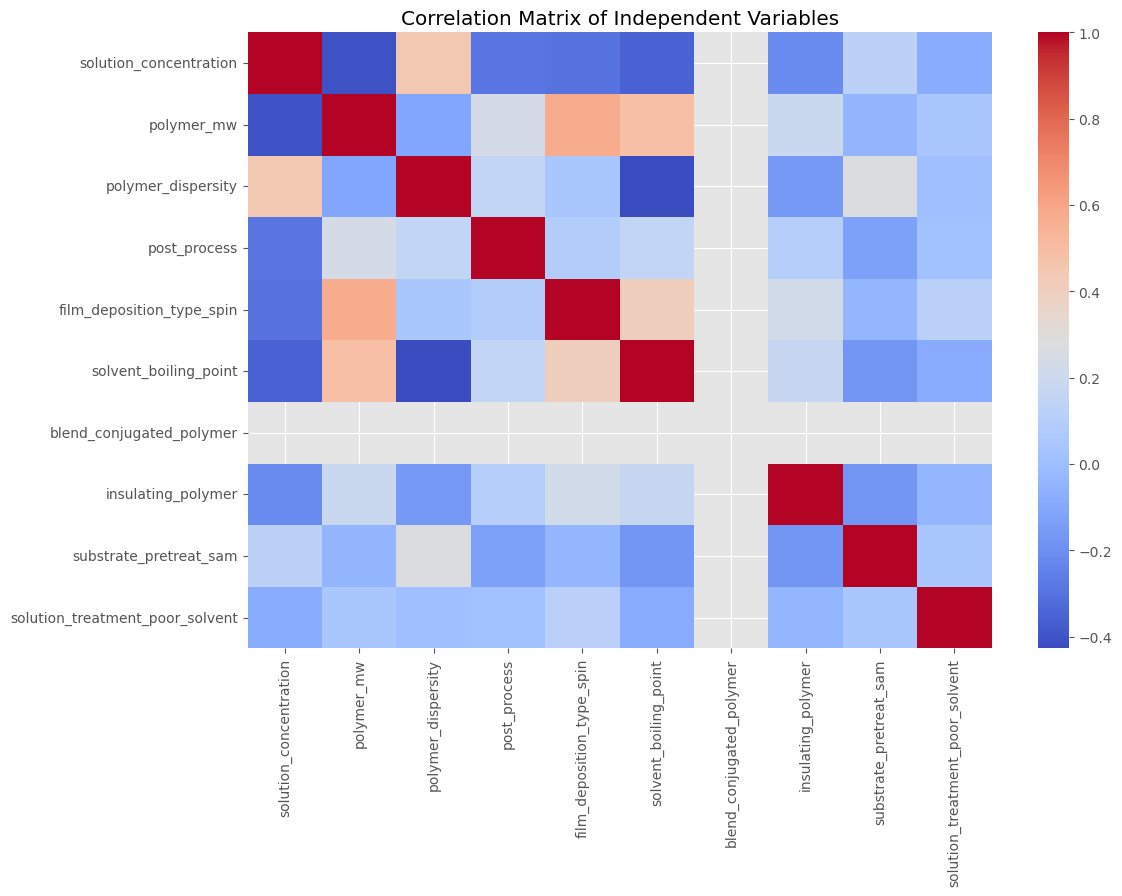

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


IndexError: index 10 is out of bounds for axis 1 with size 10

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
correlation_matrix = DPP_DTT_X.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()
plt.savefig(fname='DPP_DTT_revised_matrix.tif', format='tiff', dpi=300)

vif_data = pd.DataFrame()
vif_data['Feature'] = DPP_DTT_X.columns
vif_data['VIF'] = [
    variance_inflation_factor(DPP_DTT_X, i + 1) for i in range(DPP_DTT_X.shape[1])
]

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.823991     0.682261
1   3      0.786321     0.770927
2   4      0.782456     0.776505
3   5      0.783472     0.748265
4   6      0.781563     0.699709
5   7      0.780796     0.687504
6   8      0.782275     0.712133
7   9      0.778850     0.672377
8  10      0.780045     0.527762


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [9]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import AdaBoostRegressor

# Define the objective function for Bayesian Optimization
def objective_function(**params):
    # Convert parameters to float (BayesianOptimization passes them as numpy.float64)
    params = {k: float(v) for k, v in params.items()}
    
    # Instantiate AdaBoost Regressor with given parameters
    model = AdaBoostRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate']
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Return the R^2 score as the objective
    return r2_score(y_test, y_pred)

# Define the parameter space for Bayesian Optimization
pbounds = {
    'n_estimators': (10, 200),  # Number of estimators
    'learning_rate': (0.01, 1.0)  # Learning rate
}

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=5,  # Number of initial random points
    n_iter=20  # Number of iterations
)

# Output the best parameters and the corresponding R^2 score
print("Best parameters:", optimizer.max['params'])
print("Best R^2 score:", optimizer.max['target'])

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.691     | 0.3808    | 190.6     |
| 2         | 0.6555    | 0.7347    | 123.7     |
| 3         | 0.6249    | 0.1645    | 39.64     |
| 4         | 0.7005    | 0.0675    | 174.6     |
| 5         | 0.7235    | 0.6051    | 144.5     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

| 6         | 0.7273    | 0.1366    | 150.4     |
| 7         | 0.7805    | 0.9794    | 81.57     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| 8         | 0.7559    | 0.1223    | 93.26     |
| 9         | 0.4295    | 0.0109    | 69.5      |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 10        | 0.5924    | 0.9757    | 86.88     |
| 11        | 0.6296    | 0.04215   | 50.9      |
| 12        | 0.6306    | 0.4474    | 166.6     |
| 13        | 0.6579    | 0.02843   | 93.28     |
| 14        | 0.7557    | 0.4012    | 102.6     |
| 15        | 0.7523    | 0.6933    | 33.26     |
| 16        | 0.5459    | 0.608     | 38.82     |
| 17        | 0.4378    | 0.7948    | 177.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 18        | 0.7672    | 0.7385    | 33.36     |
| 19        | 0.651     | 0.3337    | 93.25     |
| 20        | 0.7566    | 0.9559    | 59.68     |
| 21        | 0.6333    | 0.9612    | 81.57     |
| 22        | 0.6689    | 0.2162    | 157.3     |
| 23        | 0.6307    | 0.821     | 139.3     |
| 24        | 0.6809    | 0.5071    | 137.7     |
| 25        | 0.6894    | 0.6383    | 155.4     |
Best parameters: {'learning_rate': 0.9793596500920299, 'n_estimators': 81.5659964104875}
Best R^2 score: 0.7805020204875375


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

R2 score on test set: 0.7470282966672682


ValueError: x and y must be the same size

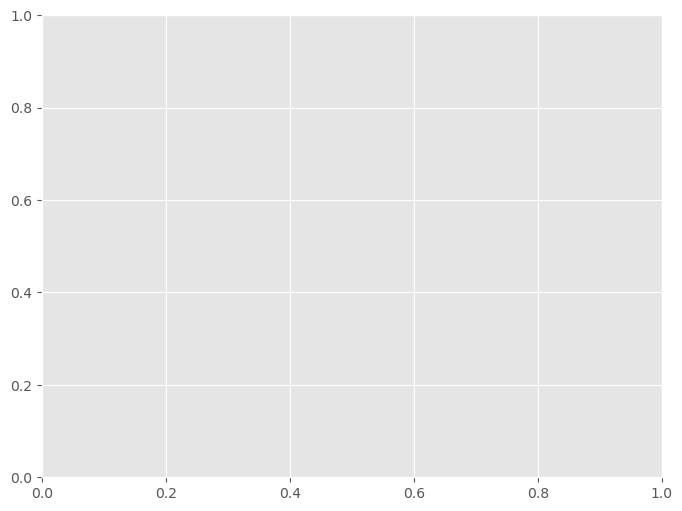

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Example: Generate synthetic data
# Split data into training and testing sets

# Train a regression model (e.g., AdaBoost Regressor)
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals: differences between observed and predicted values
residuals = y_test - y_pred

# Compute R2 score for reference
print("R2 score on test set:", r2_score(y_test, y_pred))

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
